In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import json

In [21]:
experiments = {}

with open("pyro_air_results.jsonl", "r") as f:
    lines = f.readlines()

for line in lines:
    parsed = json.loads(line)
    name = parsed.pop("name")
    experiments[name] = parsed

print(experiments.keys())
print(next(iter(experiments.values())).keys())

dict_keys(['TraceGraphELBO', 'TraceGraphELBO (no baseline)', 'TraceGraphELBO (no mask)', 'RenyiELBO', 'RenyiELBO (5 particles)', 'RenyiELBO (1 particle)', 'RenyiELBO (2 particles, batch_size=1)', 'TraceGraphELBO (2 particles)'])
dict_keys(['elbo_y', 'elbo_x', 'accuracy_y', 'accuracy_x', 'elapsed'])


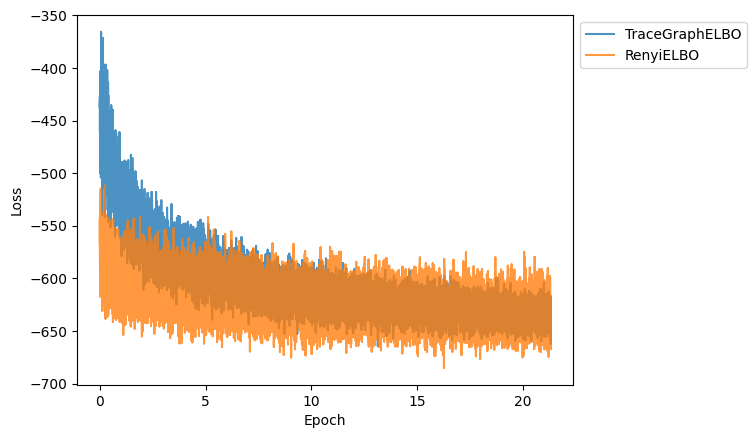

In [22]:
# Epoch vs -ELBO
to_plot = ["TraceGraphELBO", "RenyiELBO"]

for name in to_plot:
    stats = experiments[name]
    plt.plot(stats["elbo_x"], stats["elbo_y"], label=name, alpha=0.8)

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", ncol=1)

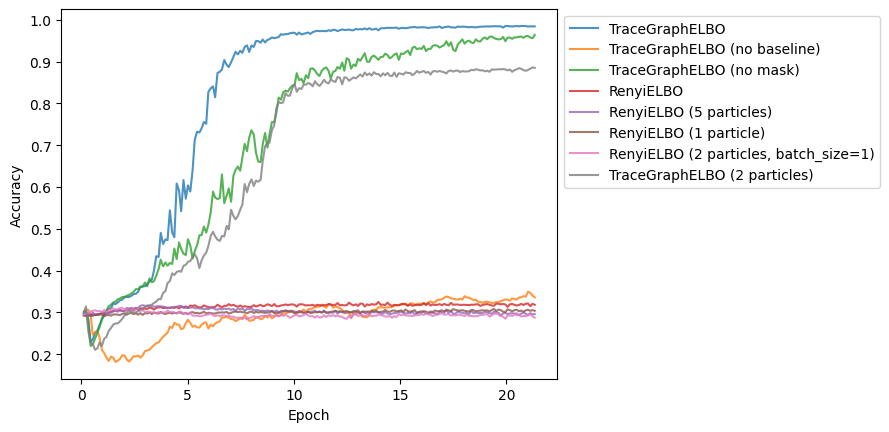

In [23]:
# Epoch vs Accuracy
to_plot = experiments.keys()

for name in to_plot:
    stats = experiments[name]
    plt.plot(stats["accuracy_x"], stats["accuracy_y"], label=name, alpha=0.8)

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", ncol=1)

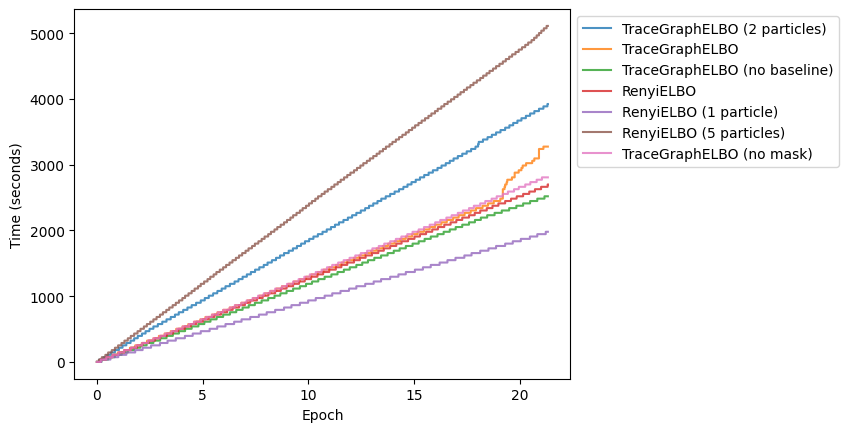

In [26]:
# Epoch vs time (might not be very valuable since I'm running most of the
# experiments locally)
to_plot = set(experiments.keys()) - {"RenyiELBO (2 particles, batch_size=1)"}

for name in to_plot:
    stats = experiments[name]
    # note that the log frequency of elbo and time is the same, so we can
    # use the same x-axis (whereas accuracy is evaluated less frequently)
    plt.plot(stats["elbo_x"], stats["elapsed"], label=name, alpha=0.8)

plt.xlabel("Epoch")
plt.ylabel("Time (seconds)")
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", ncol=1)